Gini for wine

              precision    recall  f1-score   support

         Bad       0.55      0.59      0.57       141
        Good       0.66      0.63      0.64       179

    accuracy                           0.61       320
   macro avg       0.61      0.61      0.61       320
weighted avg       0.61      0.61      0.61       320



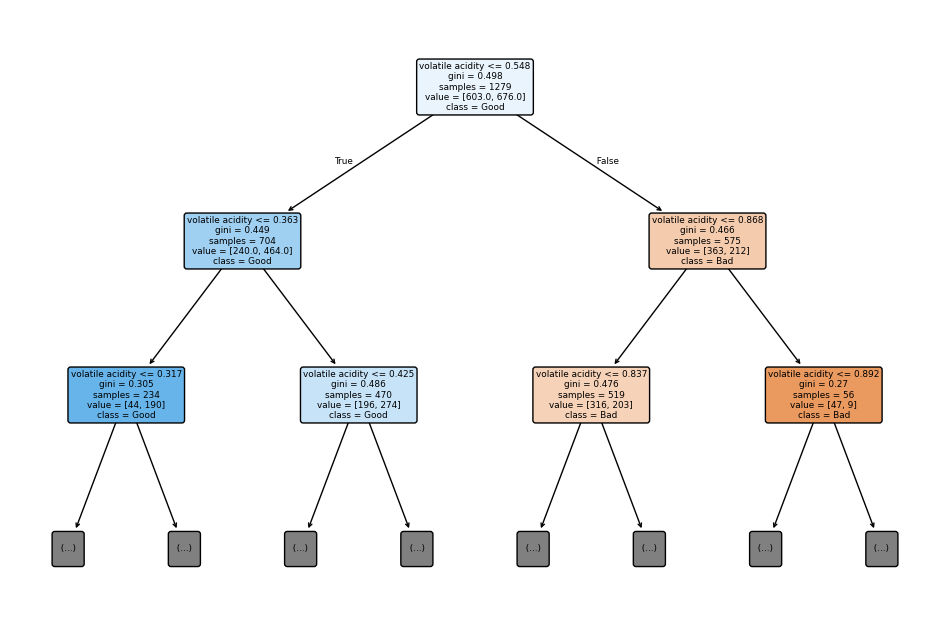

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

loan = pd.read_csv('winequality-red.csv')

X = loan[['volatile acidity']]
y = loan['quality']
y = y.apply(lambda x: 'Good' if x >= 6 else 'Bad')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=['volatile acidity'], class_names=['Bad', 'Good'], rounded=True,max_depth=2)
plt.show()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def gini_index(label):
  prob = label.value_counts(normalize = True)
  return 1-np.sum(prob**2)

def info_gain(df,feature,target):
  gini_before = gini_index(df[target])
  subsets = [df[df[feature]==value][target] for value in df[feature].unique()]
  weighted = sum((len(subset)/len(df))*gini_index(subset) for subset in subsets)
  return gini_before - weighted


features = ['volatile acidity']
target = 'quality'

df = pd.read_csv('winequality-red.csv')

print(f'Initial Gini Index:{gini_index(df[target])}')
for feature in features:
  print(f'Information Gain for {feature}:{info_gain(df,feature,target)}')
  for value in df[feature].unique():
    subset = df[df[feature]==value][target]
    print(f'Gini Index for {value}:{gini_index(subset)}')

Initial Gini Index:0.6426632342524897
Information Gain for volatile acidity:0.10378159033842493
Gini Index for 0.7:0.48
Gini Index for 0.88:0.31999999999999984
Gini Index for 0.76:0.5599999999999999
Gini Index for 0.28:0.5860113421550095
Gini Index for 0.66:0.5473372781065088
Gini Index for 0.6:0.46265278406518795
Gini Index for 0.65:0.59375
Gini Index for 0.58:0.6523545706371192
Gini Index for 0.5:0.5548204158790171
Gini Index for 0.615:0.4444444444444444
Gini Index for 0.61:0.5733882030178326
Gini Index for 0.62:0.5208333333333333
Gini Index for 0.56:0.5242214532871972
Gini Index for 0.59:0.6127547666009205
Gini Index for 0.32:0.6691871455576559
Gini Index for 0.22:0.2777777777777777
Gini Index for 0.39:0.5991836734693878
Gini Index for 0.43:0.5527312060573284
Gini Index for 0.49:0.553469387755102
Gini Index for 0.4:0.6033601168736304
Gini Index for 0.41:0.620752984389348
Gini Index for 0.71:0.4444444444444444
Gini Index for 0.645:0.5
Gini Index for 0.675:0.4444444444444444
Gini Inde